In [3]:
#Special module written for this class
#This provides access to data and to helper functions from previous weeks
#Make sure you update it before starting this notebook
import lucem_illud_2020 #pip install -U git+git://github.com/Computational-Content-Analysis-2020/lucem_illud_2020.git

#All these packages need to be installed from pip
import numpy as np #For arrays
import scipy as sp #For some stats
import pandas as pd #Gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import seaborn #Makes the graphics look nicer
import pyanno #On python3 make sure to pip install pyanno3

#We need to import these this way due to how pyanno is setup
from pyanno.measures import pairwise_matrix, agreement, cohens_kappa, cohens_weighted_kappa, fleiss_kappa, krippendorffs_alpha, pearsons_rho, scotts_pi, spearmans_rho
from pyanno.annotations import AnnotationsContainer
from pyanno.models import ModelA, ModelBt, ModelB

from functools import reduce
from itertools import permutations
import math


#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning
%matplotlib inline

import os #For looking through files
import os.path #For managing file paths

## <span style="color:red">*Pitch the Domain of your Project*</span>

<span style="color:red">In the two cells immediately following, describe **WHAT** you are planning to analyze for your final project (i.e., texts, contexts and the social game, world and actors you intend to learn about through your analysis) (<200 words) and **WHY** you are going to do it (i.e., why would theory and/or the average person benefit from knowing the results of your investigation) (<200 words)? [**Note**: your individual or collective project can change over the course of the quarter if new data and/or analysis opportunities arise or if old ones fade away.]

## ***What?*** 
I am planning to analyze the relationship between people’s support and and emotional contagion. I find a dataset of comments and their parent threads on Reddit with upvotes visible, which piques my curiosity about the relationship between comments’ upvotes and their parent threads’ upvotes and what affects this relationship. I decide to investigate it from the perspective of emotional contagion, which means that given the parent texts, or in other words the emotional context, will those comments with similar sentiments gain more support than those sentimentally different? I am going to perform sentimental analyses on both comments and parent comments to see if there is any relationship between these two.

## ***Why?***
Kramer, Guillory, & Hancock (2014) empirically proves that there is massive-scale emotional contagion spreading through social media, which means that only by posting texts on the Internet, people’s emotions can be influenced by others’ emotional expressions. Regarding our project, we are trying to delve into this phenomenon and find out its further impact on public support, which actually to some extent reflects people’s degrees of sharing the original emotions and expressing this kind of empathy in the form of upvotes and downvotes. We are not only interested in emotional contagion on social media, but also its manifestations especially public support which is a complex synthesis of public empathy, bandwagon effect, and reasonability of the content. We plan to use this large dataset which avoids the problem of representation errors to investigate the special ways of emotional expressions on social media and delve into their impacts on public support, which is valuable in political and sociological terms.

<p>Kramer, A. D., Guillory, J. E., & Hancock, J. T. (2014). Experimental evidence of massive-scale emotional contagion through social networks. Proceedings of the National Academy of Sciences, 111(24), 8788-8790.

## <span style="color:red">*Pitch Your Sample*</span>

<span style="color:red">In the cell immediately following, describe the rationale behind your proposed sample design for your final project. What is the social game, social work, or social actors about whom you are seeking to make inferences? What are its virtues with respect to your research questions? What are its limitations? What are alternatives? What would be a reasonable path to "scale up" your sample for further analysis (i.e., high-profile publication)? (<200 words).

Considering that this dataset is about comments on Reddit, which endows those users with Internet-use propensity and anonymity, the social actors are undoubtedly these Reddit users and the social game is the discussion on certain topics in the form of Reddit threads. The qualities of Reddit make it just the appropriate platform for us to research this topic, because it is the most visited interest Internet community in which there are a wide variety of users and its capability to manifest both people’s original posts and others’ comments on them enables us to connect comments with their parent threads, which is especially crucial for research on the relationship between people’s emotional expressions. Reddit certainly has its own limitations on representation, as we hope to represent the more general public and the mutability of an active Internet community in terms of its slangs or special language uses like memes can significantly affect the accuracy of sentimental analyses. I think that to enhance the meaning of our research we need to adopt survey methods to provide more evidence on our results or extend our research to other social media platforms to generalize our results.

## <span style="color:red">*Your turn*</span>

<span style="color:red">Perform a content annotation survey of some kind in which at least 3 people evaluate and code each piece of content, using Amazon Mechanical Turk as described in the MTurk slides in the Assignment link on Canvas, or by hand with friends.  With the resulting data, calculate, visualize and discuss inter-coder agreement or covariation with appropriate metrics. What does this means for the reliability of human assessments regarding content in your domain?

Restricted by time and the accessibility of my dataset, this time I cannot use my dataset in the annotation survey. I choose Kanye West's lyrics as the substitute. 6 respondents are asked to code for the sentiment of lyrics, with the fourth respondent the bad coder. The sentimental scores range from 0 to 10. The higher the score is, the more positive the lyric is.

In [10]:
df = pd.read_csv("C:/Users/zyj/kanye_west_coding.csv")
anno = AnnotationsContainer.from_array(df.values[:, 1:])

In [11]:
anno.annotations

array([[ 0,  1,  0,  5,  1,  1],
       [ 0,  2,  1,  6,  1,  1],
       [ 0,  2,  1,  5,  0,  0],
       [ 3,  3,  5,  8,  4,  2],
       [ 6,  5,  4,  2,  6,  7],
       [ 9,  9, 10,  5,  8,  7],
       [10, 10,  9,  4,  9,  9],
       [ 7,  5,  8,  5,  6,  7],
       [ 5,  7,  6, 10,  6,  5],
       [10, 10,  9,  3,  9, 10],
       [ 7,  6,  7,  5,  8,  8],
       [ 9,  7,  9,  2,  8,  9],
       [ 7,  9, 10,  5,  9, 10],
       [ 4,  5,  2, 10,  3,  3],
       [ 6,  6,  5,  4,  7,  5],
       [ 3,  2,  3,  7,  3,  2],
       [10, 10,  9,  5,  9, 10],
       [ 5,  7,  7,  1,  6,  5],
       [ 7,  8,  8,  4,  8,  9],
       [ 7,  7,  8,  5,  7,  7],
       [ 6,  8,  7,  1,  5,  7],
       [ 5,  4,  5,  9,  5,  3],
       [ 3,  5,  6,  5,  4,  2],
       [ 4,  6,  6,  8,  4,  5],
       [ 9,  8,  9,  5,  8,  8],
       [ 3,  2,  2,  5,  1,  2],
       [ 6,  5,  6,  2,  5,  5],
       [ 3,  5,  4,  7,  3,  2],
       [ 7,  7,  6,  1,  8,  6],
       [ 6,  5,  7,  7,  7,  8],
       [ 6

In [12]:
anno.labels

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [13]:
pyanno.measures.agreement.labels_frequency(anno.annotations, 11)

array([0.04975124, 0.06467662, 0.05970149, 0.05721393, 0.04726368,
       0.16666667, 0.10945274, 0.15174129, 0.13930348, 0.09701493,
       0.05721393])

[[2. 2. 3. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 2. 1. 0. 3. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 2. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 1. 2. 0. 0. 0.]
 [0. 0. 0. 0. 1. 7. 2. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 2. 2. 4. 5. 1. 0.]
 [0. 0. 0. 0. 0. 1. 2. 1. 2. 2. 0.]
 [0. 0. 0. 0. 0. 0. 1. 1. 2. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 3.]]


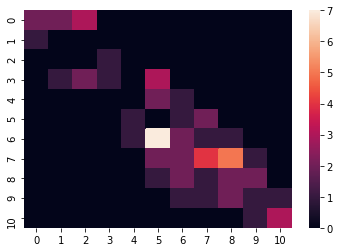

In [14]:
c = pyanno.measures.agreement.confusion_matrix(anno.annotations[:,0], anno.annotations[:,1], 11)
print(c)
ac = seaborn.heatmap(c)
plt.show()

In [15]:
scotts_pi(anno.annotations[:,0], anno.annotations[:,1])

0.12120065582040608

In [16]:
fleiss_kappa(anno.annotations[::])

0.09491964099352954

In [17]:
cohens_kappa(anno.annotations[:,0], anno.annotations[:,1])

0.13333333333333333

In [19]:
m = pairwise_matrix(cohens_kappa, anno.annotations)

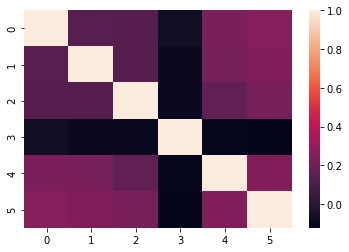

In [21]:
seaborn.heatmap(m);

In [22]:
def pairwise_metric_average(metric, array):
    """Calculate the pairwise metric average for the real elements of metric function run on an array of annotations"""
    p = permutations(range(array[0,:].size),2)
    m = [metric(array[:,x[0]], array[:,x[1]]) for x in p]
    clean_m = [c for c in m if not math.isnan(c)]
    return reduce(lambda a, b: a + b, clean_m)/len(clean_m)    
 
pairwise_metric_average(cohens_kappa, anno.annotations)

0.09824858176710678

The above scores including the pairwise cohen's $\kappa$ average is very low, which suggests a low degree of agreement of coding on rap lyrics.

In [23]:
cohens_weighted_kappa(anno.annotations[:,0], anno.annotations[:,1])

0.6364569584983135

In [24]:
pairwise_metric_average(cohens_weighted_kappa,anno.annotations)

0.3654087173402977

By contrast, the weighted pairwise cohen's $\kappa$ average is much higher, which may results from the fact that a prior bad coder has been assigned. And the weighting significantly reduces the impact of the bad coder, thus adding to the agreement scores. According to the heatmap, the coder 3, namely the bad coder does have extremely low agreements with other coders, which proves our conclusions. 

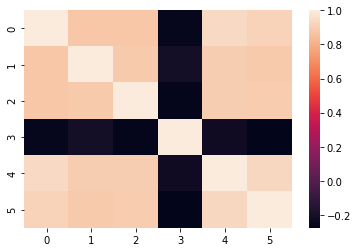

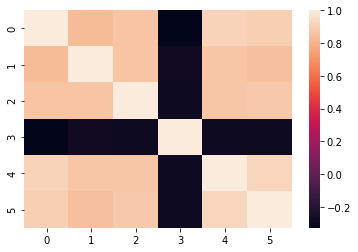

In [25]:
n = pairwise_matrix(pearsons_rho, anno.annotations)
m = pairwise_matrix(spearmans_rho, anno.annotations)
an = seaborn.heatmap(n)
plt.show()
am = seaborn.heatmap(m)
plt.show()

In [26]:
print(pairwise_metric_average(pearsons_rho,anno.annotations), pairwise_metric_average(spearmans_rho,anno.annotations))

0.5185280609055136 0.486680510989607


When regarding annotations as real values, we can also gain the same conclusions by calculating the correlations and drawing the heatmaps as above.

According to the above analyses, we can conclude that except for the bad coder we assigned, other codes perform well on attaining high agreement scores with each other, which suggests that human assessments are relatively stable when assessing the sentiment of rap lyrics.

## <span style="color:red">*Your turn*</span>

<span style="color:red">In the cells immediately following, use the results of your content annotation survey to predict high and low-quality analysts, then predict MAP estimates for your codes in question. What do these estimates suggest about the distribution of skill among your coders? How different are these estimates from a majority vote?

In [27]:
model = ModelB.create_initial_state(11, 6)

In [28]:
samples = model.sample_posterior_over_accuracy(anno.annotations, 200, burn_in_samples=100, thin_samples=3)

In [29]:
model.map(anno.annotations)

S:\Python-64\lib\site-packages\pyanno\util.py:80: RuntimeWarning: divide by zero encountered in log
  log_theta = ninf_to_num(log(theta))


In [30]:
posterior = model.infer_labels(anno.annotations)

In [31]:
votes = []
for r in anno.annotations:
    v = [0] * len(anno.labels)
    votes.append(v)
    for a in r:
        if a > -1:
            v[a] += 1
votes_array = np.array(votes)

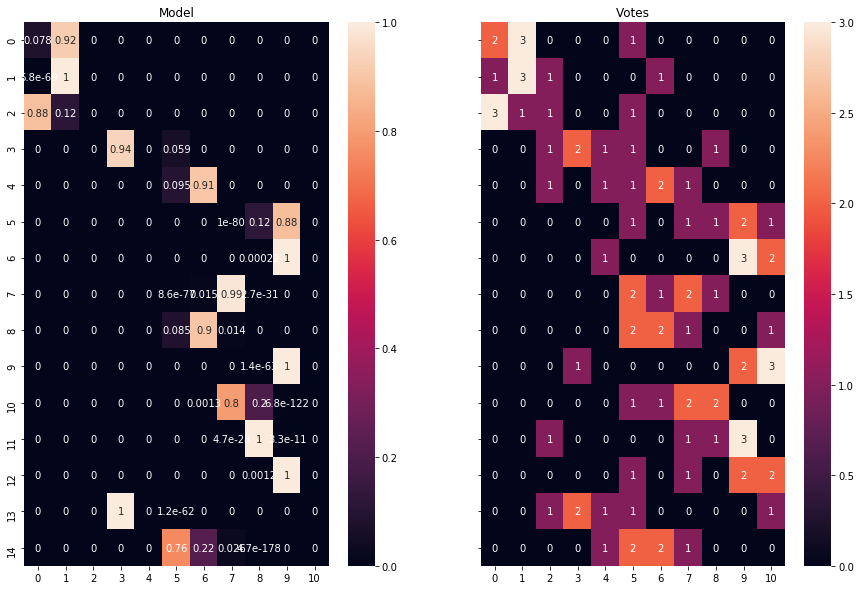

In [32]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (15, 10), sharey=True)
num_questions = 15

seaborn.heatmap(votes_array[:num_questions], annot = True, ax=ax2)
seaborn.heatmap(posterior[:num_questions], annot=True, ax =ax1)
ax1.set_title("Model")
ax2.set_title("Votes")
plt.show()

The posterior result differs markedly from taking annotator scores at face value, but still with similar patterns that when the votes of the sentimental scores are 2 or above, the value of the corresponding spot in the posterior heatmap will be significantly different than 0 and close to 1. Thus, they are different in specific values, but share a similar pattern of votes.

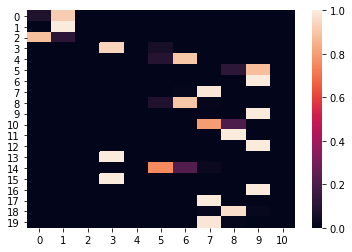

In [34]:
ax = seaborn.heatmap(posterior[:20,])
plt.show()

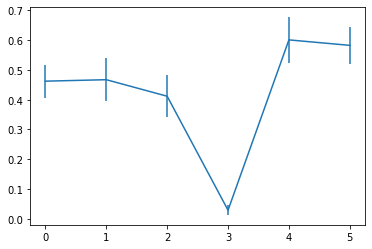

In [35]:
model = ModelBt.create_initial_state(11, 6)
model.mle(anno.annotations)
samples = model.sample_posterior_over_accuracy(anno.annotations, 200, burn_in_samples=100, thin_samples=3)
y =  samples.mean(axis=0)#.mean(axis = 1).mean(axis = 1)
y_ci = samples.std(axis=0)#.mean(axis = 1).mean(axis = 1)
plt.figure()
plt.errorbar(range(6),y, yerr = y_ci)
plt.show()

We can clearly find out that the figure drops sharply at 3, which is just the bad coder we have assigned. As for the distribution of the assessing skills, the coders 4 and 5 have a comparatively higher accuracy than other coders.